# Preliminary preparations

In [1]:
import pandas as pd
import geopandas as gpd

import requests
import re
import json

Define necessary links and paths:<br>
1. [Alberta townships geospatial layer](https://geospatial-sit.alberta.ca/titan/rest/services/base/alberta_township_system/MapServer/7/query),
2. Anil Gupta's `.csv` data style (located in the `./assets` directory), and
3. Anil Gupta's list of Townships (located in the `./assets` directory).

In [2]:
# ArcGIS REST API endpoint for the specific ATS layer
alta_ats = "https://geospatial-sit.alberta.ca/titan/rest/services/base/alberta_township_system/MapServer/7/query"

# .csv data style
data_style = './assets/T001R19W4.csv'

# list of townships needed
township_list = [
    'T001R08W4',
    'T001R12W4',
    'T001R13W4',
    'T001R18W4',
    'T001R19W4',
    'T001R20W4',
    'T001R22W4',
    'T001R23W4',
    'T002R11W4',
    'T002R12W4',
    'T002R13W4',
    'T002R14W4',
    'T002R15W4',
    'T002R16W4',
    'T002R17W4',
    'T002R18W4',
    'T002R21W4',
    'T002R23W4'
]

# Extracting needed layers

In [3]:
# list of township IDs based on the `PID` column of the source ATS data
ids_list = [''.join(re.split("[TRW]", ats)[::-1]) for ats in township_list]

# creating a custrom SQL query statement to find `ids_list` values in the `PID` column
sql_query = f'FILE_NAME IN ({', '.join([f"'{item}'" for item in ids_list])})'

In [4]:
# Specifying query parameters
params_ag = {
    'where': sql_query,
    'outFields': '*',
    'returnGeometry': 'true',
    'f': 'geojson',  # Output format as GeoJSON
}

# Make the request to the ArcGIS REST API
response_ag = requests.get(alta_ats, params=params_ag)

# Check if the request was successful
if response_ag.status_code == 200:
    # Load GeoJSON data into a GeoDataFrame
    gdf_ag = gpd.read_file(response_ag.text)
else:
    print(f"Error: {response_ag.status_code} - {response_ag.text}")

/var/folders/rw/ngg2x10x2s139yr4lchhykz40000gn/T/ipykernel_20343/1121272195.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_ag.centroid.plot(ax=ax, zorder=2, c='black')


<Axes: >

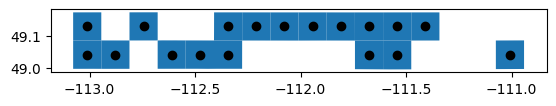

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

gdf_ag.plot(ax=ax, zorder=1)
gdf_ag.centroid.plot(ax=ax, zorder=2, c='black')

In [6]:
# Check if everything requested in the `township_list` is available in `gdf_ag`
for record in ids_list:
    if record in gdf_ag.FILE_NAME.to_list():
        print(f"{record}: present")

408001: present
412001: present
413001: present
418001: present
419001: present
420001: present
422001: present
423001: present
411002: present
412002: present
413002: present
414002: present
415002: present
416002: present
417002: present
418002: present
421002: present
423002: present
